# YOLOv8 Object Detection Demonstration

This notebook provides an example of running the YOLOv8 model on RyzenAI and ONNXRuntime (VitisAI EP), allowing users to directly execute YOLOv8 on an IPU laptop.

## Introduction of YOLOv8

[YOLOv8](https://github.com/ultralytics/ultralytics) is a cutting-edge, state-of-the-art (SOTA) model that builds upon the success of previous YOLO versions and introduces new features and improvements to further boost performance and flexibility. YOLOv8 is designed to be fast, accurate, and easy to use, making it an excellent choice for a wide range of object detection and tracking, instance segmentation, image classification and pose estimation tasks.

Object detection involves identifying and locating objects of interest within an image or video. Traditional methods often relied on sliding window approaches, which were computationally expensive and slow. YOLO revolutionized the field by treating object detection as a single regression problem. 

![YOLOv8 Models](https://raw.githubusercontent.com/ultralytics/assets/main/im/banner-tasks.png)


## YOLOv8 Architecture Overview
+ Backbone Network
The backbone network is the foundation of YOLOv8, responsible for feature extraction from the input image. YOLOv8 employs CSPDarknet53, a variant of Darknet, as its backbone. 

The CSPDarknet53 architecture introduces a novel Cross-Stage Partial (CSP) connection, enhancing the information flow between different stages of the network and improving gradient flow during training.

+ Neck and Head Structures
YOLOv8 introduces a Path Aggregation Network (PANet) as the neck structure. PANet facilitates information flow across different spatial resolutions, enabling the model to capture multi-scale features effectively. 

The head structure consists of multiple detection heads, each responsible for predicting bounding boxes, class probabilities, and objectness scores at different scales.

+ Detection Head
The detection head of YOLOv8 is where the real innovation lies. It utilizes a modified version of the YOLO head, incorporating dynamic anchor assignment and a novel IoU (Intersection over Union) loss function. 

These improvements contribute to more accurate bounding box predictions and better handling of overlapping objects.

Here is the Network overview of YOLOv8.

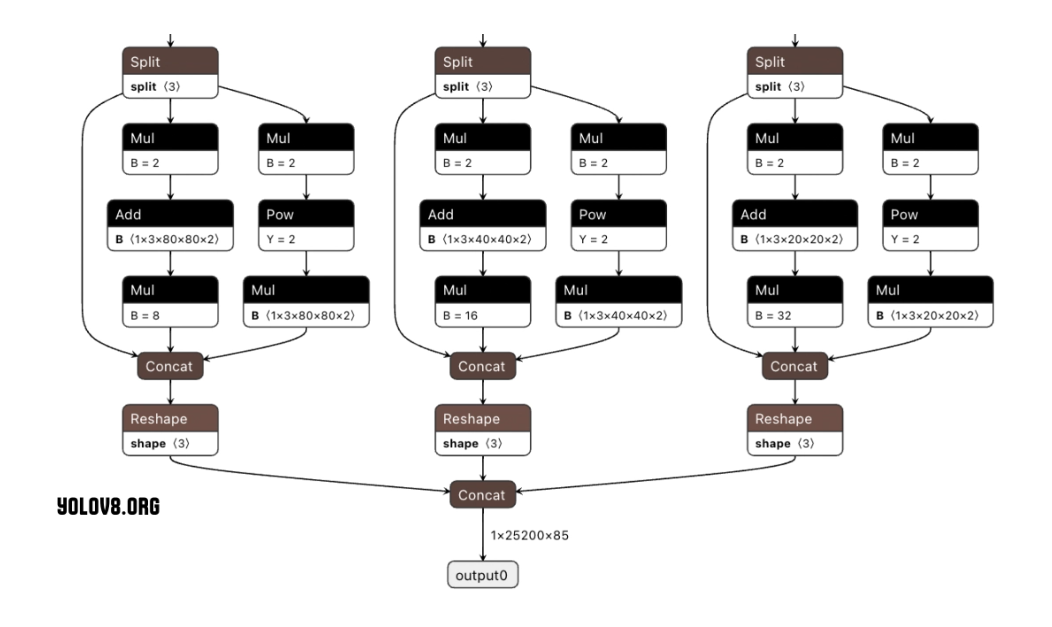

In [1]:
from IPython.display import Image
Image(filename='yolov8_network.png')

## Environment Setup

Ensure your environment includes the necessary libraries, such as ONNXRuntime and the RyzenAI SDK.
Please refer to the [Ryzen AI SW platform installation guide](https://ryzenai.docs.amd.com/en/latest/inst.html#) to install all the dependent packages. 

### Import Necessary Pakages  

In [ ]:
! pip install matplotlib
! pip install opencv-python

# Use libraries like matplotlib to display results
import matplotlib.pyplot as plt
import cv2
import subprocess

## Run
Object detection is a fundamental task in computer vision, with applications ranging from autonomous vehicles to surveillance systems. You Only Look Once (YOLO) has been at the forefront of object detection algorithms, and the latest iteration, YOLOv8, represents a significant leap in terms of accuracy and efficiency.

### Jpeg sample

1. Model and Data Preparation

Make sure you have the following files in the yolov8_e2e\implement\ folder.

'DetectionModel_int.onnx': The model file.

'sample_yolov8.jpg': The test image.

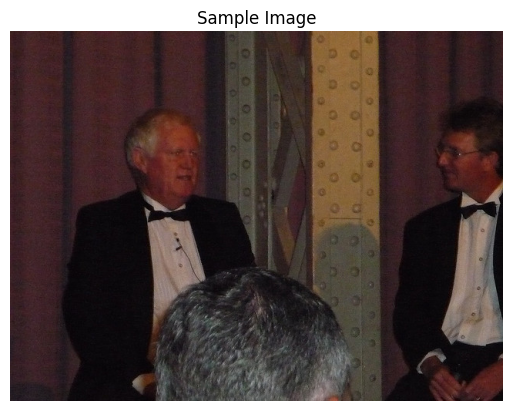

In [8]:
image = cv2.imread('sample_yolov8.jpg')  # Make sure the path to your image is correct
if image is not None:
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.title('Sample Image')
    plt.axis('off')  # Turn off axis numbers and ticks
    plt.show()
else:
    print("Image not loaded. Check the file path.")


2. Run Detection
Use the command below to perform object detection:

In [19]:
# # Call the external command to run the model
command = 'run_jpeg.bat'
args = ['.\\DetectionModel_int.onnx', '.\\sample_yolov8.jpg']

result = subprocess.run([command] + args, capture_output=True, text=True)

print(result.stdout)


(RyzenAI-SW) c:\Users\siyazhuo\Desktop\zhuosy\yolov8_e2e\yolov8_e2e\implement>set XLNX_VART_FIRMWARE=c:\Users\siyazhuo\Desktop\zhuosy\yolov8_e2e\yolov8_e2e\implement\..\1x4.xclbin 

(RyzenAI-SW) c:\Users\siyazhuo\Desktop\zhuosy\yolov8_e2e\yolov8_e2e\implement>set PATH=c:\Users\siyazhuo\Desktop\zhuosy\yolov8_e2e\yolov8_e2e\implement\..\bin;c:\Users\siyazhuo\Desktop\zhuosy\yolov8_e2e\yolov8_e2e\implement\..\python;c:\Users\siyazhuo\Desktop\zhuosy\yolov8_e2e\yolov8_e2e\implement\..;C:\Users\siyazhuo\AppData\Local\anaconda3\envs\RyzenAI-SW\Lib\site-packages\cv2\../../x64/vc14/bin;c:\Users\siyazhuo\AppData\Local\anaconda3\envs\RyzenAI-SW;C:\Users\siyazhuo\AppData\Local\anaconda3\envs\RyzenAI-SW;C:\Users\siyazhuo\AppData\Local\anaconda3\envs\RyzenAI-SW\Library\mingw-w64\bin;C:\Users\siyazhuo\AppData\Local\anaconda3\envs\RyzenAI-SW\Library\usr\bin;C:\Users\siyazhuo\AppData\Local\anaconda3\envs\RyzenAI-SW\Library\bin;C:\Users\siyazhuo\AppData\Local\anaconda3\envs\RyzenAI-SW\Scripts;C:\Users\s

3. Display Results
Process and display the model's output, such as drawing bounding boxes.

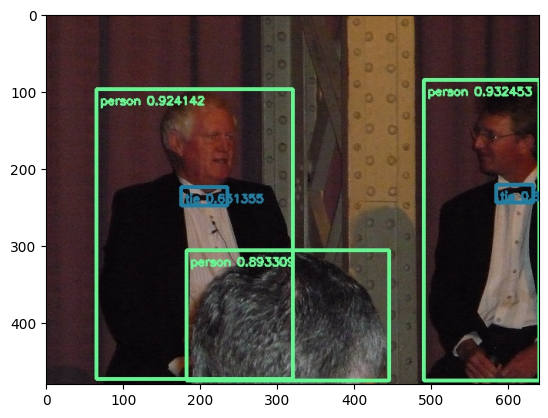

In [20]:
# Load and display the image
img = cv2.imread('result.jpg')  # Assuming the output image is saved as output.jpg
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()